In [48]:
# 20230304_140940
!ls -lh '/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230330_030238_mim_dn121/'

total 11M
-rw-rw-r-- 1 pamessina pamessina  44K Mar 30 16:31 'chest_imagenome_gold_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl'
-rw-rw-r-- 1 pamessina pamessina 864K Mar 30 16:31  dicom_id_to_pred_chest_imagenome_probs__chest_imagenome_gold.pkl
-rw-rw-r-- 1 pamessina pamessina 5.9M Mar 30 16:37  dicom_id_to_pred_chest_imagenome_probs__mimiccxr_test_set.pkl
-rw-rw-r-- 1 pamessina pamessina 3.4M Mar 30 16:38  dicom_id_to_pred_probs__mimiccxr_val__chest_imagenome.pkl
-rw-rw-r-- 1 pamessina pamessina  61K Mar 30 16:38 'mimiccxr_test_set_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl'


In [50]:
from medvqa.utils.files import load_pickle

In [51]:
metrics = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230330_030238_mim_dn121/chest_imagenome_gold_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl')

In [52]:
dicom_id_to_probs = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230330_030238_mim_dn121/dicom_id_to_pred_chest_imagenome_probs__chest_imagenome_gold.pkl')

In [53]:
len(dicom_id_to_probs)

500

In [54]:
metrics.keys()

dict_keys(['chestimagenome_label_prf1', 'chestimagenome_label_acc', 'chestimagenome_label_rocauc', 'chestimagenome_label_auc', 'chestimagenome_label_prcauc', 'chest_imagenome_label_names'])

In [55]:
metrics['chestimagenome_label_prcauc']['macro_avg']

0.25506027065802733

In [56]:
from medvqa.evaluation.visual_module import ChestImaGenomeMLCVisualizer

In [57]:
import medvqa
from importlib import reload

In [58]:
reload(medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management)
reload(medvqa.evaluation.visual_module)

<module 'medvqa.evaluation.visual_module' from '/home/pamessina/medvqa/medvqa/evaluation/visual_module.py'>

In [59]:
mlc_visualizer = ChestImaGenomeMLCVisualizer(
    mlc_metrics_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230330_030238_mim_dn121/chest_imagenome_gold_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl',
    dicom_id_to_probs_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230330_030238_mim_dn121/dicom_id_to_pred_chest_imagenome_probs__chest_imagenome_gold.pkl',
    test_label_names_filename='gold_binary_labels.pkl',
    test_labels_filename='gold_imageId2binaryLabels.pkl',
    use_gold_in_test=True,
)

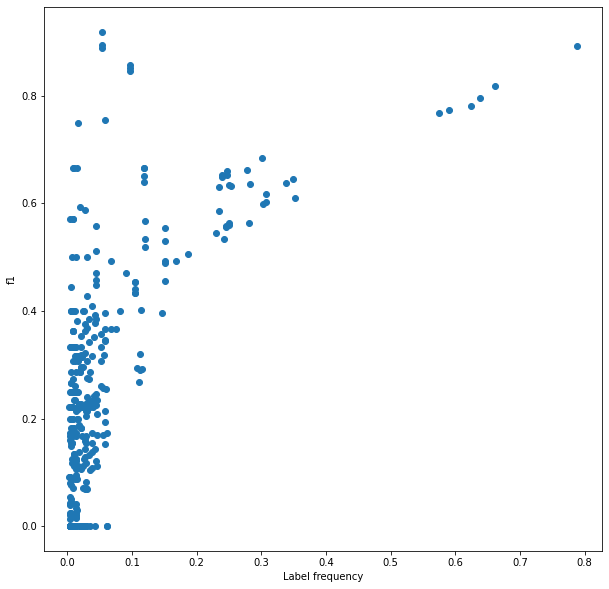

In [60]:
mlc_visualizer.plot_label_frequency_vs_metric('f1')

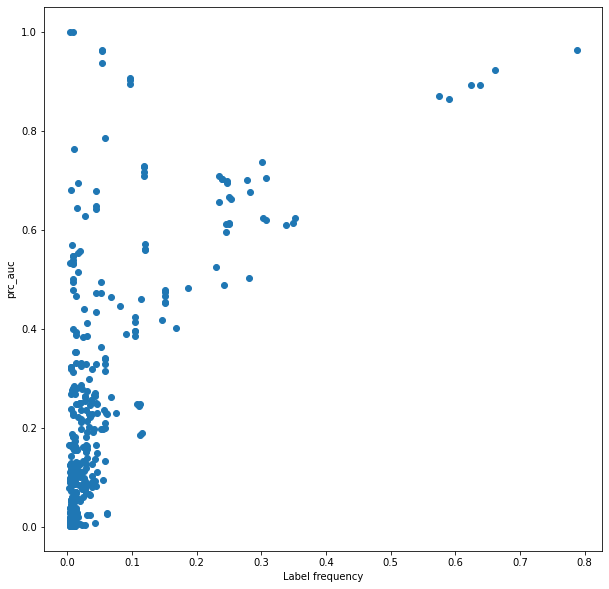

In [61]:
mlc_visualizer.plot_label_frequency_vs_metric('prc_auc')

In [65]:
mlc_visualizer.print_labels_in_range('prc_auc', max_val=0.6, min_freq=0.2)

score: 0.4888, freq: 0.2415, label: ('left lower lung zone', 'anatomicalfinding', 'atelectasis')
score: 0.5026, freq: 0.2815, label: ('left lung', 'anatomicalfinding', 'atelectasis')
score: 0.5261, freq: 0.2292, label: ('right lung', 'anatomicalfinding', 'atelectasis')
score: 0.5967, freq: 0.2454, label: ('left lung', 'anatomicalfinding', 'pleural effusion')


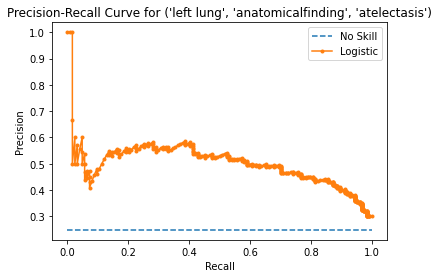

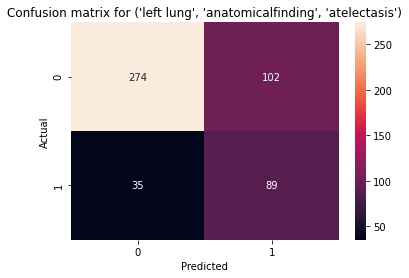

p: 0.4660, r: 0.7177, f1: 0.5651, roc_auc: 0.8021, pr_auc: 0.5026


In [66]:
mlc_visualizer.compute_metrics_from_probs(('left lung', 'anatomicalfinding', 'atelectasis'))

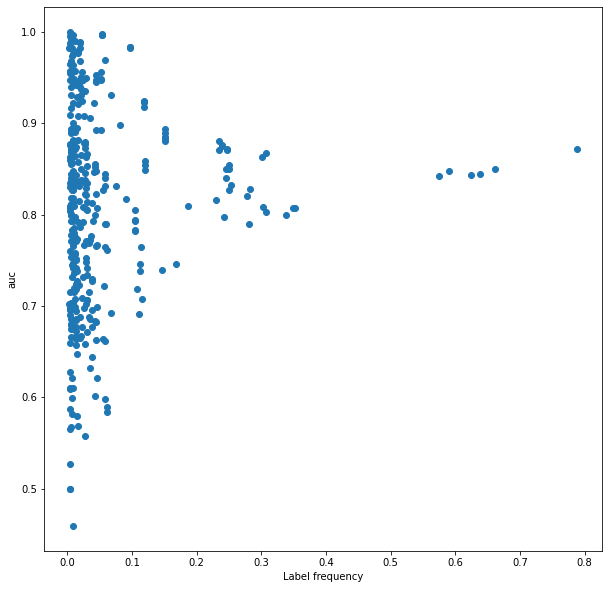

In [34]:
mlc_visualizer.plot_label_frequency_vs_metric('auc')

In [23]:
mlc_visualizer.metrics.keys()

dict_keys(['chestimagenome_label_prf1', 'chestimagenome_label_acc', 'chestimagenome_label_rocauc', 'chestimagenome_label_auc', 'chestimagenome_label_prcauc', 'chest_imagenome_label_names'])

In [40]:
_idx = mlc_visualizer.metrics['chest_imagenome_label_names'].index(('upper mediastinum', 'tubesandlines', 'swan-ganz catheter'))
mlc_visualizer.metrics['chestimagenome_label_prf1']['p'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_prf1']['r'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_prf1']['f1'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_rocauc']['per_class'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_auc']['per_class'][_idx],\
mlc_visualizer.metrics['chestimagenome_label_prcauc']['per_class'][_idx]

(0.0, 0.0, 0, 0.9679358717434869, 0.9679358717434869, 0.029411764705882353)

In [35]:
mlc_visualizer.print_labels_in_range('auc', min_val=0.9, max_freq=0.01)

score: 0.9002, freq: 0.0080, label: ('right mid lung zone', 'anatomicalfinding', 'mass/nodule (not otherwise specified)')
score: 0.9086, freq: 0.0038, label: ('aortic arch', 'anatomicalfinding', 'mediastinal widening')
score: 0.9168, freq: 0.0055, label: ('left lung', 'disease', 'alveolar hemorrhage')
score: 0.9224, freq: 0.0083, label: ('right clavicle', 'tubesandlines', 'subclavian line')
score: 0.9305, freq: 0.0050, label: ('right clavicle', 'tubesandlines', 'endotracheal tube')
score: 0.9394, freq: 0.0055, label: ('left clavicle', 'tubesandlines', 'endotracheal tube')
score: 0.9439, freq: 0.0094, label: ('mediastinum', 'tubesandlines', 'swan-ganz catheter')
score: 0.9443, freq: 0.0090, label: ('svc', 'tubesandlines', 'subclavian line')
score: 0.9478, freq: 0.0035, label: ('right lower lung zone', 'technicalassessment', 'breast/nipple shadows')
score: 0.9536, freq: 0.0049, label: ('right upper lung zone', 'anatomicalfinding', 'mass/nodule (not otherwise specified)')
score: 0.9548, f

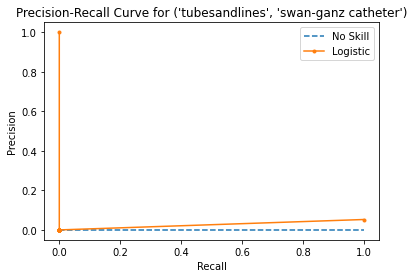

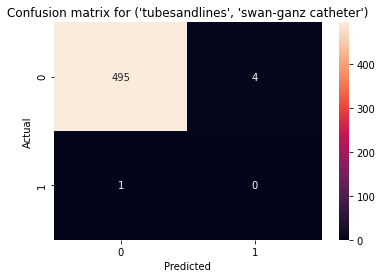

p: 0.0000, r: 0.0000, f1: 0.0000, roc_auc: 0.9639, pr_auc: 0.0263


In [46]:
mlc_visualizer.compute_metrics_from_probs(('tubesandlines', 'swan-ganz catheter'))

Positive example:
dicom_id: 2ca7d8ff-be016c15-0e95353b-657e316e-ebd0504f
Label: ('left lung', 'anatomicalfinding', 'atelectasis'), prob: 0.7158
--------------------------------------------------
Image path: /mnt/data/mimic-cxr-jpg/images/p16/p16237702/s54919114/2ca7d8ff-be016c15-0e95353b-657e316e-ebd0504f.jpg
Object: right lung (354, 395, 1092, 1897)
Object: right upper lung zone (477, 450, 969, 736)
Object: right mid lung zone (463, 1186, 887, 396)
Object: right lower lung zone (354, 1582, 955, 710)
Object: right hilar structures (900, 1105, 491, 545)
Object: right apical zone (627, 395, 819, 409)
Object: right costophrenic angle (218, 2101, 273, 272)
Object: right cardiophrenic angle (1023, 1950, 177, 301)
Object: right hemidiaphragm (354, 2046, 1187, 246)
Object: left lung (1568, 422, 1078, 1965)
Object: left upper lung zone (1596, 477, 887, 709)
Object: left mid lung zone (1568, 1186, 928, 437)
Object: left lower lung zone (1609, 1623, 1037, 764)
Object: left hilar structures (1568

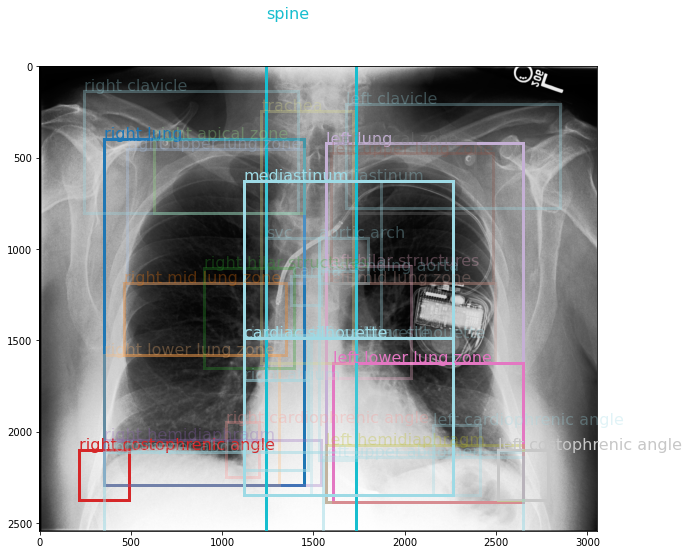

Labels:
('right lung', 'anatomicalfinding', 'pleural effusion', 0)
('right lung', 'anatomicalfinding', 'pneumothorax', 0)
('right costophrenic angle', 'anatomicalfinding', 'pleural effusion', 0)
('left lung', 'anatomicalfinding', 'atelectasis', 1)
('left lung', 'anatomicalfinding', 'lung opacity', 1)
('left lung', 'anatomicalfinding', 'pleural/parenchymal scarring', 1)
('left lung', 'nlp', 'abnormal', 1)
('left lung', 'anatomicalfinding', 'pleural effusion', 0)
('left lung', 'anatomicalfinding', 'pneumothorax', 0)
('left lower lung zone', 'anatomicalfinding', 'atelectasis', 1)
('left lower lung zone', 'anatomicalfinding', 'lung opacity', 1)
('left lower lung zone', 'anatomicalfinding', 'pleural/parenchymal scarring', 1)
('left lower lung zone', 'nlp', 'abnormal', 1)
('left costophrenic angle', 'anatomicalfinding', 'pleural effusion', 0)
('mediastinum', 'device', 'cardiac pacer and wires', 1)
('cardiac silhouette', 'device', 'cardiac pacer and wires', 1)
('cardiac silhouette', 'anatomic

In [67]:
mlc_visualizer.plot_positive_example_for_label(('left lung', 'anatomicalfinding', 'atelectasis'))

Positive example:
dicom_id: 047cee43-febc0dbc-c090646c-e655c728-c0bb1ece
Label: ('tubesandlines', 'swan-ganz catheter'), prob: 0.0744
--------------------------------------------------
Image path: /mnt/data/mimic-cxr-jpg/images/p12/p12604446/s59246897/047cee43-febc0dbc-c090646c-e655c728-c0bb1ece.jpg
Object: right lung (422, 313, 994, 1497)
Object: right upper lung zone (680, 340, 736, 545)
Object: right mid lung zone (531, 885, 844, 326)
Object: right lower lung zone (422, 1211, 912, 599)
Object: right hilar structures (953, 816, 435, 450)
Object: right apical zone (898, 313, 518, 272)
Object: right costophrenic angle (285, 1593, 273, 272)
Object: right cardiophrenic angle (1116, 1484, 150, 408)
Object: right hemidiaphragm (422, 1565, 1157, 300)
Object: left lung (1593, 313, 1089, 1838)
Object: left upper lung zone (1593, 340, 748, 545)
Object: left mid lung zone (1606, 885, 872, 462)
Object: left lower lung zone (1593, 1347, 1089, 804)
Object: left hilar structures (1593, 789, 449, 64

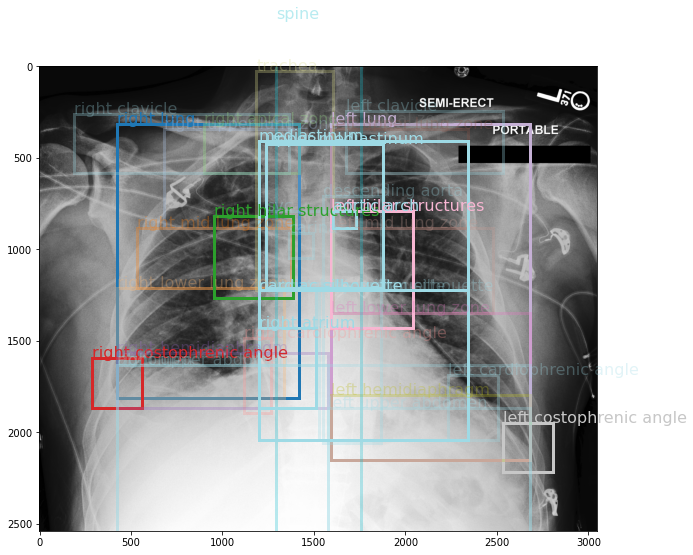

Labels:
('right lung', 'anatomicalfinding', 'lung opacity', 1)
('right lung', 'anatomicalfinding', 'pleural effusion', 1)
('right lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('right lung', 'nlp', 'abnormal', 1)
('right hilar structures', 'tubesandlines', 'swan-ganz catheter', 1)
('right hilar structures', 'anatomicalfinding', 'lung opacity', 1)
('right hilar structures', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('right hilar structures', 'nlp', 'abnormal', 1)
('right costophrenic angle', 'anatomicalfinding', 'lung opacity', 1)
('right costophrenic angle', 'anatomicalfinding', 'pleural effusion', 1)
('right costophrenic angle', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('right costophrenic angle', 'nlp', 'abnormal', 1)
('left lung', 'anatomicalfinding', 'lung opacity', 1)
('left lung', 'anatomicalfinding', 'pleural effusion', 1)
('left lung', 'anatomicalfinding', 'pulmonary edema/hazy opacity', 1)
('left lung', 'nlp', 'abnormal', 1)
('left

In [47]:
mlc_visualizer.plot_positive_example_for_label(('tubesandlines', 'swan-ganz catheter'))